In [27]:
from torchvision.transforms import ToPILImage
from PIL import Image
from IPython.display import display

import importlib
import cli
importlib.reload(cli)  # Reload the module to get the latest version
from cli import _load_and_preprocess_dataset

import vae
importlib.reload(vae)
from vae import predict_from_dataset_index, ModelType

image_pixel_size = 32
model_type = ModelType.HIGH_CAPACITY

ds_train = _load_and_preprocess_dataset(
    path="tkarr/sprite_caption_dataset",
    split="train",
    image_pixel_size=image_pixel_size,
)
ds_valid = _load_and_preprocess_dataset(
    path="tkarr/sprite_caption_dataset",
    split="valid",
    image_pixel_size=image_pixel_size,
)

/Users/harry.sadler/Library/Caches/pypoetry/virtualenvs/pixelart-dataset-exploration-iWfMpuw5-py3.12/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [20]:
from matplotlib import pyplot as plt

def viz_compare_images(img1: Image.Image, img2: Image.Image):
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')
    axes[1].imshow(img2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

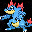

In [24]:
output_tensor = predict_from_dataset_index(
    model_type=model_type,
    model_path="best_model.pth",
    ds=ds_valid,
    ds_index=0,
    image_pixel_size=image_pixel_size,
    device="mps",
)
output_image: Image.Image = ToPILImage()(output_tensor)
display(output_image)

In [29]:
from ipywidgets import widgets

ds = ds_train
def pred_and_display(i: int):
    output_tensor = predict_from_dataset_index(
        model_type=model_type,
        model_path="best_model.pth",
        ds=ds,
        ds_index=i,
        image_pixel_size=image_pixel_size,
        device="mps",
    )
    input_image: Image.Image = ToPILImage()(ds[i]["tensor"])
    output_image: Image.Image = ToPILImage()(output_tensor)
    viz_compare_images(input_image, output_image)

image_slider = widgets.IntSlider(
    min=0,
    max=len(ds) - 1,
    step=1,
    description='Image index:',
    value=0
)

widgets.interactive(pred_and_display, i=image_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=12829), Output()), _dom_classes=('wid…

In [30]:
from ipywidgets import widgets

ds = ds_valid
def pred_and_display(i: int):
    output_tensor = predict_from_dataset_index(
        model_type=model_type,
        model_path="best_model.pth",
        ds=ds,
        ds_index=i,
        image_pixel_size=image_pixel_size,
        device="mps",
    )
    input_image: Image.Image = ToPILImage()(ds[i]["tensor"])
    output_image: Image.Image = ToPILImage()(output_tensor)
    viz_compare_images(input_image, output_image)

image_slider = widgets.IntSlider(
    min=0,
    max=len(ds) - 1,
    step=1,
    description='Image index:',
    value=0
)

print("validate dataset")
widgets.interactive(pred_and_display, i=image_slider)

validate dataset


interactive(children=(IntSlider(value=0, description='Image index:', max=712), Output()), _dom_classes=('widge…